# Example Processing for High-resolution DEM
## Setup and Installation of Python environment
This Notebook and the Python Code to extract Connected Components from longitudinal river profiles requires several python modules to be installed.

Using `conda`, you can create your own environment *DEM_CC* and install the required modules (if you haven't done so already):
```
conda --create DEM_CC
conda activate DEM_CC
conda install -y pandas numpy geopandas rasterio matplotlib scipy kneed sklearn seaborn
```
You can do similar steps in your `pip` environment.

## Installation of LSDTopoTools
Furthermore, the Code requires an installed instance of LSDTopoTools2. A detailed inscription is on their [webpage(https://lsdtopotools.github.io/LSDTT_documentation/LSDTT_installation.html).

You can use the Docker version - but if you want full versability (and if you work on a Linux/Mac System), you may want to compile a local version. Running an Ubuntu 19.04 or 20.04 should allow you to install this locally (without much intervention). If you don't know what you are doing, likely the `docker` version is more useful.

```
cd ~
wget https://raw.githubusercontent.com/LSDtopotools/LSDTT_Edinburgh_scripts/master/LSDTT_native_linux_setup.sh
sh LSDTT_native_linux_setup.sh
```
Make sure to add this path to your environment variable PATH to call the various subscripts of LSDTopoTools.

    
## Installing DEM_ConnectedComponents
Download the most recent source code:

```
git clone https://github.com/UP-RS-ESP/DEM_ConnectedComponents.git
```

and install:
```
python setup.py install
```
    
# DEM Preprocessing
There are a few steps that need to be done before the `DEM_connectedcomponents` can be run. These include pre-processing steps with `LSDTopoTools` or a similar environment.

The DEM should be in a projected coordinate system (e.g., UTM).

## *lsdtt-chi-mapping 1*
Generate a chi map using `lsdtt-chi-mapping`. This requires a driver file and a DEM in binary format.

First, convert the DEM to BIL format (usually from GeoTIFF):
```
gdal_translate -of ENVI testClip_3m.tif testClip_3m.bil
```

Next, generate a driver file
```
read path: /home/bodo/DEM_ConnectedComponents
read fname: testClip_3m

write path: /home/bodo/DEM_ConnectedComponents
write fname: testClip_3m

# Parameter for filling the DEM
min_slope_for_fill: 0.0001

# print statements 
print_channels_to_csv: true
print_segmented_M_chi_map_to_csv: true
#print_junctions_to_csv: true

# method to extract channels
print_area_threshold_channels: true

# Parameters for selecting channels and basins
threshold_contributing_pixels: 1000
maximum_basin_size_pixels: 11111111
find_complete_basins_in_window: false
test_drainage_boundaries: false

# Parameters for chi analysis
A_0: 1
m_over_n: 0.45
n_iterations: 20
target_nodes: 80
minimum_segment_length: 10
sigma: 10.0
skip: 2
```

and run with:
```
lsdtt-chi-mapping testClip_3m.driver
```


## *lsdtt-chi-mapping 2*
Generate a chi map using `lsdtt-chi-mapping`. This requires a driver file and a DEM in binary format.

First, convert the DEM to BIL format (usually from GeoTIFF):
```
gdal_translate -of ENVI debrisBasins.tif debrisBasins.bil
```

Next, generate a driver file
```
read path: /home/bodo/DEM_ConnectedComponents
read fname: debrisBasins

write path: /home/bodo/DEM_ConnectedComponents
write fname: debrisBasins

# Parameter for filling the DEM
min_slope_for_fill: 0.0001

# print statements 
print_channels_to_csv: true
print_segmented_M_chi_map_to_csv: true
#print_junctions_to_csv: true

# method to extract channels
print_area_threshold_channels: true

# Parameters for selecting channels and basins
threshold_contributing_pixels: 1000
maximum_basin_size_pixels: 11111111
find_complete_basins_in_window: false
test_drainage_boundaries: false

# Parameters for chi analysis
A_0: 1
m_over_n: 0.45
n_iterations: 20
target_nodes: 80
minimum_segment_length: 10
sigma: 10.0
skip: 2
```

and run with:
```
lsdtt-chi-mapping debrisBasins.driver
```



# Run DEM_ConnectedComponents
First step is to merge outputs from LSDTT

In [1]:
from connectedComponentsFunctions import *

path = "/home/ariane/Documents/NWArgentina/Flowlines/CleanGithub/DEM_ConnectedComponents/"

Merging CSV files from LSDTopoTools...


Calculating channel-slope using different regression lengths: 100%|██████████| 25/25 [02:23<00:00,  5.73s/it]


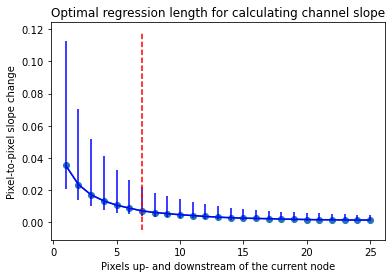

Out of the given pixel thresholds [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25], I recommend taking the value 7.


In [3]:
#load output from LSDTT
lsdttTable = mergeLSDTToutput(fname = "testClip", path = path, resolution=3, epsg = 32719) 

#find a good pixel threshold for calculating channel slope using 10 random channels within the area of interest 
#constrained by the polygon stored in testMask.shp (optional)
pixThr = findPixelThreshold(lsdttTable, sampleStreams = 10 , mask = "testMask.shp", path = path)


Merging CSV files from LSDTopoTools...


Finding connected components using different slope-change thresholds:   0%|          | 0/12 [00:00<?, ?it/s]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:   8%|▊         | 1/12 [00:12<02:22, 12.95s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  17%|█▋        | 2/12 [00:25<02:06, 12.70s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  25%|██▌       | 3/12 [00:39<01:58, 13.15s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  33%|███▎      | 4/12 [00:52<01:47, 13.40s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  42%|████▏     | 5/12 [01:06<01:35, 13.58s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  50%|█████     | 6/12 [01:21<01:23, 13.84s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  58%|█████▊    | 7/12 [01:35<01:10, 14.11s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  67%|██████▋   | 8/12 [01:50<00:56, 14.19s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  75%|███████▌  | 9/12 [02:05<00:43, 14.39s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  83%|████████▎ | 10/12 [02:18<00:28, 14.24s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds:  92%|█████████▏| 11/12 [02:32<00:14, 14.13s/it]

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.


Finding connected components using different slope-change thresholds: 100%|██████████| 12/12 [02:46<00:00, 13.91s/it]

Out of the provided slope-change thresholds [0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26], I recommend the value (0.0, 2)


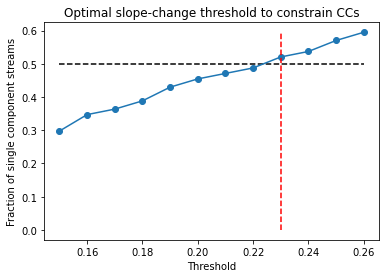

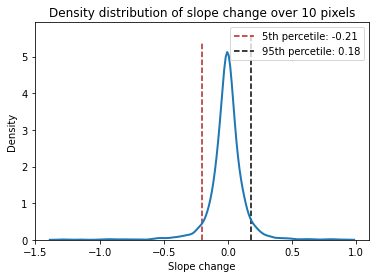

Investigating slope change over 10 pixels, I reccomend a value of 0.19


In [4]:
#get channel network of debris-flow sample regions 
debrisSamples = mergeLSDTToutput(fname = "debrisBasins_final", path = path, resolution=3, epsg = 32719)

#use debris-flow sample regions to get a good slope-change threshold to constrain CCs  
dSlopeThr = findDSlopeThresholdDebrisSamples(debrisSamples, pixThr = pixThr, minCCLength = 10, bridge = 5, thresholdRange = np.arange(0.15,0.26,0.01))

#if there are no debris-flow sample regions available, you may also find a threshold by comparing slope change along
#a pre-defined distance, e.g. 10 pixels (you may provide a list of different values here), and retrieve the mean of the 5th and 95th percentile
dSlopeThr2 = findDSlopeThresholdAlternative(lsdttTable, dist = 10, pixThr = pixThr, sampleStreams = 10, mask = "testMask.shp", path = path)


In [5]:
#run CC Analysis with optimal parameters for the test region considering only those channel heads that lie within AOI polygon
runCCAnalysis(fname = "testClip", path = path, lsdttTable = lsdttTable, pixThr = 7, dSlopeThr = 0.23, minCCLength = 10, bridge = 5, mask = "testMask.shp")
#clip derived connected components to AOI (optional)
getCCsInAOI(fname = "testClip", path=path, mask= "testMask.shp", epsg = 32719, pixThr= 7, dSlopeThr = 0.23, bridge = 5)

I found 31 catchments.

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.
I have removed 1 stream(s) shorter than the minimal required CC length.
I have written all streams with assigned CC ID to testClip_ConnectedComponents_streams_7_0.23_5.csv
I have written the aggregated parameters for all CCs to testClip_ConnectedComponents_7_0.23_5.csv
I have written testClip_ConnectedComponents_7_0.23_5_inAOI.csv
and testClip_ConnectedComponents_streams_7_0.23_5_inAOI.csv


In [6]:
#run CC Analysis for debris-flow sample regions
runCCAnalysis(fname = "debrisBasins_final", path = path, lsdttTable = debrisSamples, pixThr = 7, dSlopeThr = 0.23, minCCLength = 10, bridge = 5)

I found 34 catchments.

Stream is shorter than regression length. I am going to fit a single regression for the entire channel.
I have removed 1 stream(s) shorter than the minimal required CC length.
I have written all streams with assigned CC ID to debrisBasins_final_ConnectedComponents_streams_7_0.23_5.csv
I have written the aggregated parameters for all CCs to debrisBasins_final_ConnectedComponents_7_0.23_5.csv


I am going to assign debris-flow similarity values to all CCs intestClip_ConnectedComponents_7_0.23_5_inAOI.csv
I am going to use debrisBasins_final_ConnectedComponents_7_0.23_5.csv as debris-flow samples.


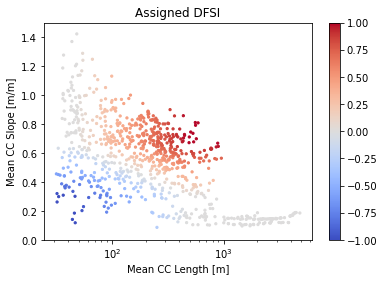

I have written testClip_ConnectedComponents_streams_withDFSI_7_0.23_5.csv


In [2]:
#assign DFSI values using debris-flow sample regions
#if DF samples are not available, feel free to provide your own common slope and length values for debris flows,
#but make sure to provide length as log(length)
dfsiValues = assignDFSI( path = path, allCCName = "testClip", debrisName = "debrisBasins_final", pixThr = 7, dSlopeThr = 0.23, allExt = "_inAOI")

#assign DFSI values to channel network
backsorting(fname = "testClip", path = path, dfsiValues = dfsiValues, pixThr = 7, dSlopeThr = 0.23, ext = "_inAOI")
